In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

In [3]:
def plot_from_sim_paths_steps(file_name, steps = 10**5, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    Q_paths_M = np.asarray( M_res["Q_paths"] )
    C_paths_M = np.asarray( M_res["C_paths"] )
    Q_paths_B = np.asarray( B_res["Q_paths"] )
    C_paths_B = np.asarray( B_res["C_paths"] )
    QPM = Q_paths_M[:,0:steps]
    CPM = C_paths_M[:,0:steps]
    QPB = Q_paths_B[:,0:steps]
    CPB = C_paths_B[:,0:steps]
    (average_cost_M, average_queue_M) = utils.average_paths(CPM,QPM, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(CPB,QPB, frac)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

Expected cost for c = 0 case: 0.979
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x87a4edf4
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 3e-01]
Presolve time: 0.02s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.000000000e-01
Objective Value: 0.50
x:  [[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]


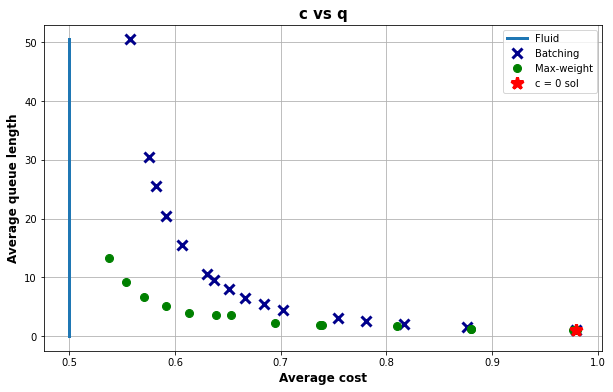

In [4]:
file_name = "../sim_paths_spatial_uniform_4_W_0.5.pkl"
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 0.879
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xe3fe00cd
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 3e-01]
Presolve time: 0.02s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.000000000e-01
Objective Value: 0.10
x:  [[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]


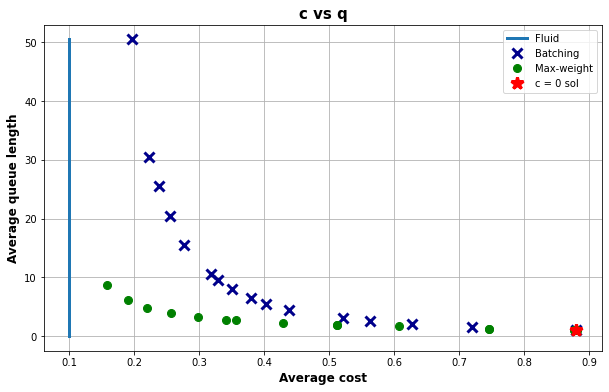

In [5]:
file_name = "../sim_paths_spatial_uniform_4_W_0.1.pkl"
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 1.104
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x56264d4d
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 3e-01]
Presolve time: 0.02s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.000000000e+00
Objective Value: 1.00
x:  [[0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]
 [0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]]


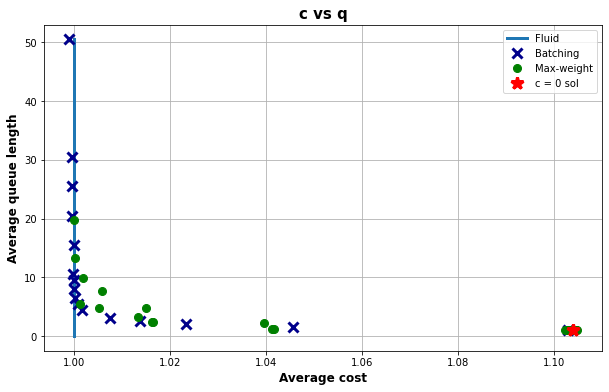

In [6]:
file_name = "../sim_paths_spatial_uniform_4_W_1.0.pkl"
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 1.166
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xf94bfd36
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 3e-01]
Presolve time: 0.01s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.000000000e+00
Objective Value: 1.00
x:  [[0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]
 [0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]]


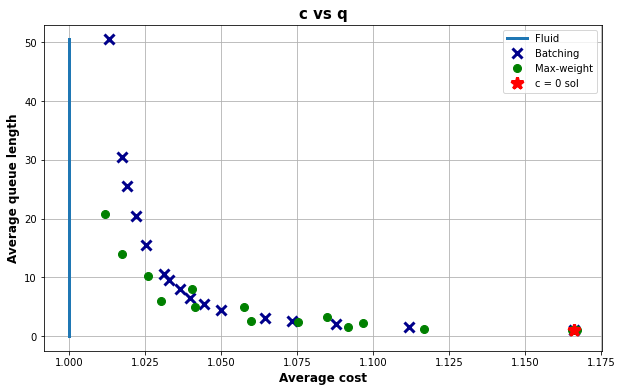

In [7]:
file_name = "../sim_paths_spatial_uniform_4_W_1.25.pkl"
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 1.207
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x4da622bb
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 3e-01]
Presolve time: 0.01s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.000000000e+00
Objective Value: 1.00
x:  [[0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]
 [0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]]


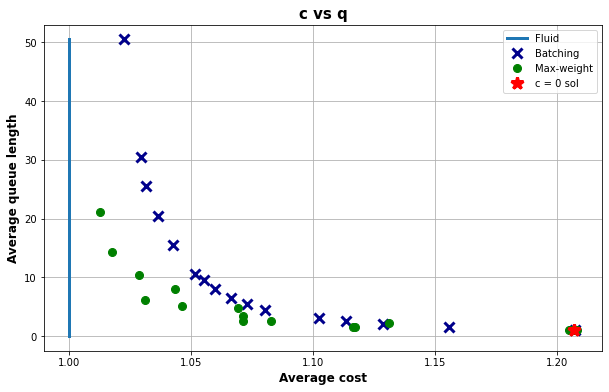

In [8]:
file_name = "../sim_paths_spatial_uniform_4_W_1.414.pkl"
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 1.354
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x2fa024f9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 3e-01]
Presolve time: 0.02s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.000000000e+00
Objective Value: 1.00
x:  [[0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]
 [0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]]


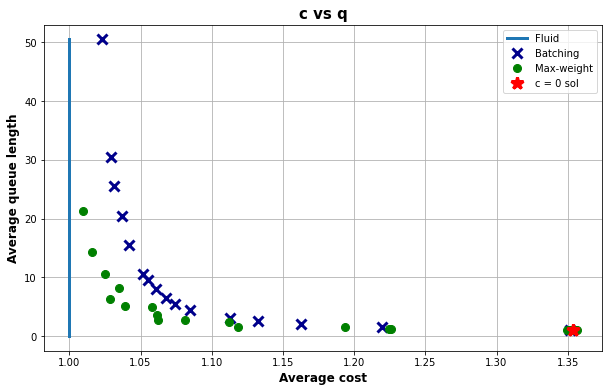

In [9]:
file_name = "../sim_paths_spatial_uniform_4_W_2.0.pkl"
plot_from_sim_paths(file_name)

In [10]:
def minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B):
    len_M = len(average_cost_M)
    len_B = len(average_cost_B)
    max_val = 0
    for i in range(len_M):
        shifted = np.abs(average_queue_B - average_queue_M[i])
        idx = shifted.argmin()
        if(max_val < average_cost_B[idx] - average_cost_M[i]):
            max_val = average_cost_B[idx] - average_cost_M[i]
            (cM,qM,cB,qB)= ( average_cost_M[i], average_queue_M[i], average_cost_B[idx], average_queue_B[idx] )
    return cM, qM, cB, qB

In [20]:
weights = [0.1,0.5,1.0,1.25,1.414,2.0]
k = len(weights)
gaps_4 = np.zeros(k)

for i in range(k):
    w = weights[i]
    file_name = "../sim_paths_spatial_uniform_4_W_" + str(w) + '.pkl'
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]

    # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
    gaps_4[i] = cB - cM
    i = i+1

In [21]:
gaps_4

array([0.22328409, 0.12264313, 0.06179652, 0.04944007, 0.04231003,
       0.12694254])

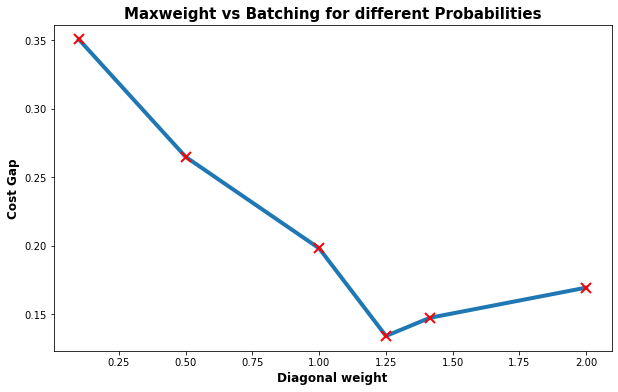

In [22]:
plt.figure( figsize=(10,6) )
plt.plot(weights,gaps,linewidth=4)
plt.plot(weights,gaps,'rx', markersize = 10, markeredgewidth=2)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Diagonal weight", weight='bold',fontsize=12)
plt.title("Maxweight vs Batching for different Probabilities", weight='bold',fontsize=15)
plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

In [23]:
weights = [0.1,0.5,1.0,1.25,1.414,2.0]
k = len(weights)
gaps_9 = np.zeros(k)

for i in range(k):
    w = weights[i]
    file_name = "../sim_paths_spatial_uniform_9_W_" + str(w) + '.pkl'
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]

    # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
    gaps_9[i] = cB - cM
    i = i+1

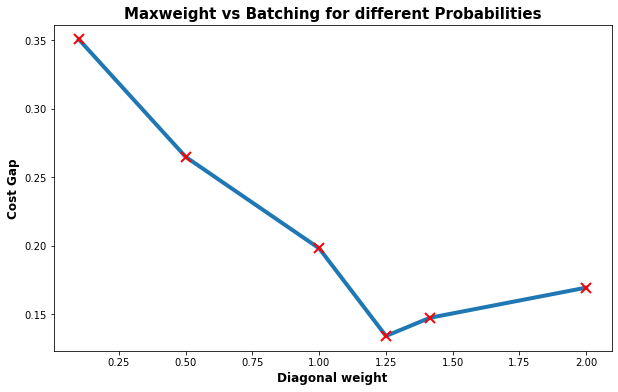

In [24]:
plt.figure( figsize=(10,6) )
plt.plot(weights,gaps_9,linewidth=4)
plt.plot(weights,gaps_9,'rx', markersize = 10, markeredgewidth=2)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Diagonal weight", weight='bold',fontsize=12)
plt.title("Maxweight vs Batching for different Probabilities", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

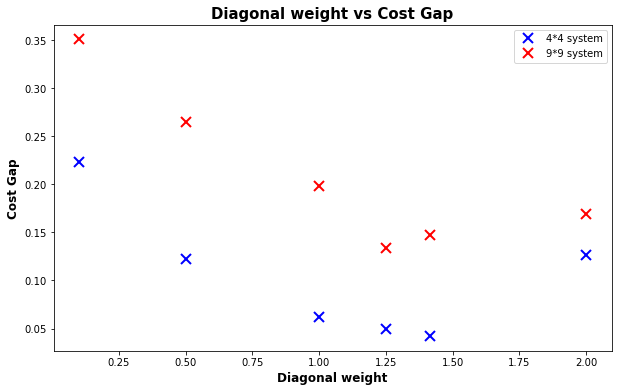

In [29]:
plt.figure( figsize=(10,6) )
plt.plot(weights,gaps_4,'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(weights,gaps_9,'rx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Diagonal weight", weight='bold',fontsize=12)
plt.title("Diagonal weight vs Cost Gap", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

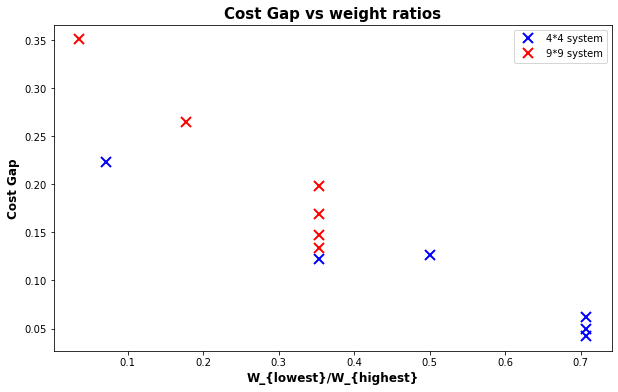

In [33]:
ratios_4 = []
for w in weights:
    if w < 1:
        ratios_4.append( w/1.414 )
    elif w > 1.414:
        ratios_4.append(1/w)
    else:
        ratios_4.append(1/1.414)
ratios_9 = []
for w in weights:
    if w < 1:
        ratios_9.append( w/2.828 )
    elif w > 2.828:
        ratios_9.append(w/1)
    else:
        ratios_9.append(1/2.828)
plt.figure( figsize=(10,6) )
plt.plot(ratios_4,gaps_4,'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(ratios_9,gaps_9,'rx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("W_{lowest}/W_{highest}", weight='bold',fontsize=12)
plt.title("Cost Gap vs weight ratios", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

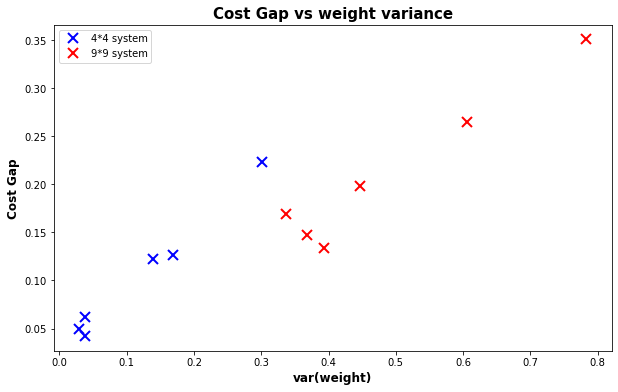

In [37]:
variances_4 = []
variances_9 = []
for w in weights:
    variances_4.append( np.var([w,1.414,1]) )
    variances_9.append( np.var([w,1,1.414,2,2.236,2.82]) )
plt.figure( figsize=(10,6) )
plt.plot(variances_4,gaps_4,'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(variances_9,gaps_9,'rx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("var(weight)", weight='bold',fontsize=12)
plt.title("Cost Gap vs weight variance", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

In [40]:
W4 = np.asarray( [[0.5 ,       1. ,         1. ,         1.41421356] ,
 [1. ,         0.5 ,        1.41421356 , 1.        ] ,
 [1.  ,        1.41421356 , 0.5 ,        1.        ] ,
 [1.41421356 , 1. ,         1. ,         0.5       ] ,])

In [52]:
def generate_weights(N_grid, is_spatial = 0, arbitrary = 0):
    Weights = np.zeros(shape=(N_grid,N_grid))
    if is_spatial:
        X = np.arange(0.5,N_grid,1)
        Y = np.arange(0.5,N_grid,1)
        cell_locs = []
        for i in range(N_grid):
            for j in range(N_grid):
                cell_locs.append([X[i],Y[j]])
        N_cells = N_grid*N_grid
        Weights = np.zeros(shape=(N_cells,N_cells))

        for i in range(N_cells):
            for j in range(N_cells):
                if i == j:
                    Weights[i,j] = arbitrary
                else:
                    Weights[i,j] = np.sqrt((cell_locs[i][0] - cell_locs[j][0])**2 + (cell_locs[i][1] - cell_locs[j][1])**2)
                
        print("Spatial",Weights)
    else:
        rand_weights = np.random.rand(N_grid, N_grid)
        N_cells = N_grid*N_grid
        for counter in range(N_cells):
            for i in range(N_grid):
                for j in range(N_grid):
                    for k in range(N_grid):
                        rand_weights[i,j] = min(rand_weights[i,j],rand_weights[i,k] + rand_weights[k,j] )
        print("Random",rand_weights)
        Weights = rand_weights
    return(Weights)
W9 = generate_weights(3, True)

Spatial [[0.         1.         2.         1.         1.41421356 2.23606798
  2.         2.23606798 2.82842712]
 [1.         0.         1.         1.41421356 1.         1.41421356
  2.23606798 2.         2.23606798]
 [2.         1.         0.         2.23606798 1.41421356 1.
  2.82842712 2.23606798 2.        ]
 [1.         1.41421356 2.23606798 0.         1.         2.
  1.         1.41421356 2.23606798]
 [1.41421356 1.         1.41421356 1.         0.         1.
  1.41421356 1.         1.41421356]
 [2.23606798 1.41421356 1.         2.         1.         0.
  2.23606798 1.41421356 1.        ]
 [2.         2.23606798 2.82842712 1.         1.41421356 2.23606798
  0.         1.         2.        ]
 [2.23606798 2.         2.23606798 1.41421356 1.         1.41421356
  1.         0.         1.        ]
 [2.82842712 2.23606798 2.         2.23606798 1.41421356 1.
  2.         1.         0.        ]]


In [53]:
# since all arrivals are uniform, weighted variance is same as variance (equal weights)
print( np.var(W9) )
# for w in weights:  
np.fill_diagonal(W9,10)
np.var(W9)

0.554553009578326


7.201515612131113

In [56]:
W4 = generate_weights(2, True)
W9 = generate_weights(3, True)

Spatial [[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]
Spatial [[0.         1.         2.         1.         1.41421356 2.23606798
  2.         2.23606798 2.82842712]
 [1.         0.         1.         1.41421356 1.         1.41421356
  2.23606798 2.         2.23606798]
 [2.         1.         0.         2.23606798 1.41421356 1.
  2.82842712 2.23606798 2.        ]
 [1.         1.41421356 2.23606798 0.         1.         2.
  1.         1.41421356 2.23606798]
 [1.41421356 1.         1.41421356 1.         0.         1.
  1.41421356 1.         1.41421356]
 [2.23606798 1.41421356 1.         2.         1.         0.
  2.23606798 1.41421356 1.        ]
 [2.         2.23606798 2.82842712 1.         1.41421356 2.23606798
  0.         1.         2.        ]
 [2.23606798 2.         2.23606798 1.41421356 1.         1.41421356
  1.         0.         1.     

In [55]:
print(W9)

[[0.08795036 0.73612643 0.07408457]
 [0.03442053 0.65610245 0.02055474]
 [0.01386579 0.66204186 0.08795036]]


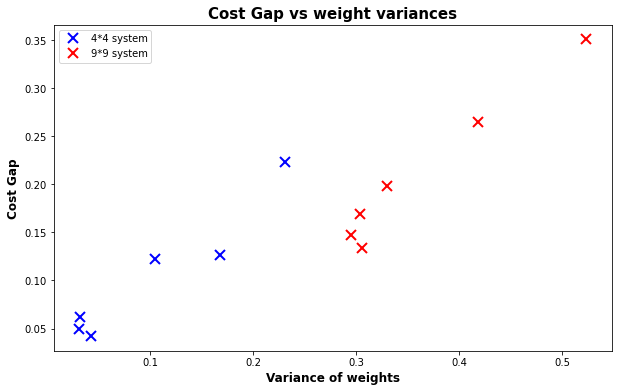

In [61]:
variances_4 = []
variances_9 = []
for w in weights:
    np.fill_diagonal(W4, w)
    np.fill_diagonal(W9, w)
    variances_4.append(np.var(W4)  )
    variances_9.append( np.var(W9) )
plt.figure( figsize=(10,6) )
plt.plot(variances_4,gaps_4,'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(variances_9,gaps_9,'rx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance of weights", weight='bold',fontsize=12)
plt.title("Cost Gap vs weight variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

In [63]:
variances_9

[0.5232448578260761,
 0.41776533723682946,
 0.3303603809447158,
 0.3051764213171775,
 0.2953615215792901,
 0.30369861650863644]

In [64]:
weights

[0.1, 0.5, 1.0, 1.25, 1.414, 2.0]

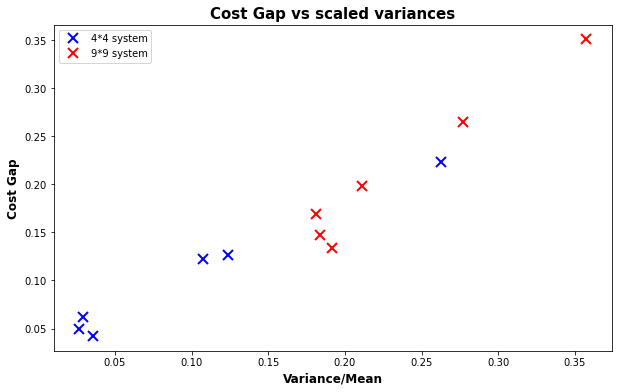

In [67]:
points_4 = []
points_9 = []
for w in weights:
    np.fill_diagonal(W4, w)
    np.fill_diagonal(W9, w)
    points_4.append(np.var(W4)/np.mean(W4)  )
    points_9.append( np.var(W9)/np.mean(W9) )
plt.figure( figsize=(10,6) )
plt.plot(points_4,gaps_4,'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(points_9,gaps_9,'rx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()